In [ ]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

from mlxtend.plotting import plot_decision_regions

## Cargamos los datos de entrada del archivo csv

In [ ]:
dataframe = pd.read_csv(r"/content/BDSeleccionadaV3.csv")
dataframe.head()

,Edad,Sexo,IMC,CintCad,GrasCorp,Cigarrillos,Alcohol,Piel,Diabetes,MasaMusc,ActFisica,Trabajo,Farmacos,ProtectorSolar,ExposicionDias,ExposicionMinutos,VitaminaD
0,37,1,23.4,0.87,20.0,5,1,4,0,23.8,0,1,7,1,2,60,20.70
1,39,1,25.9,0.91,22.0,7,1,3,0,21.8,0,1,4,2,2,30,26.74
2,60,2,30.6,0.95,25.8,7,1,3,0,34.2,1,1,7,5,0,0,20.53
3,53,2,28.4,0.93,25.0,7,1,4,0,28.7,0,2,8,1,5,150,11.35
4,39,2,25.2,0.89,18.8,7,1,3,0,26.8,1,1,8,2,1,10,34.61


In [ ]:
dataframe.describe()

,Edad,Sexo,IMC,CintCad,GrasCorp,Cigarrillos,Alcohol,Piel,Diabetes,MasaMusc,ActFisica,Trabajo,Farmacos,ProtectorSolar,ExposicionDias,ExposicionMinutos,VitaminaD
count,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000
mean,52.101490,0.887337,28.874888,0.957458,26.653492,6.824022,0.387337,4.189944,0.265363,38.802700,0.631285,1.606145,4.665736,2.850093,4.286778,935.679702,26.048371
std,14.535362,0.671180,8.783117,0.104656,10.818743,0.787685,0.487369,1.141952,0.441732,18.102313,0.528753,0.791615,2.472401,1.535800,2.988900,965.905969,12.236051
min,11.000000,0.000000,18.080000,0.010000,7.000000,1.000000,0.000000,1.000000,0.000000,13.600000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.160000
25%,40.000000,0.000000,25.485000,0.890000,18.412500,7.000000,0.000000,3.000000,0.000000,25.600000,0.000000,1.000000,2.000000,1.000000,2.000000,60.000000,17.000000
50%,51.000000,1.000000,27.900000,0.940000,24.800000,7.000000,0.000000,4.000000,0.000000,39.750000,1.000000,1.000000,4.000000,3.000000,4.000000,550.500000,23.000000
75%,63.000000,1.000000,31.050000,1.000000,34.105000,7.000000,1.000000,5.000000,1.000000,48.507500,1.000000,2.000000,7.000000,4.000000,7.000000,1765.750000,33.000000
max,90.000000,2.000000,260.410000,1.420000,50.400000,7.000000,1.000000,6.000000,1.000000,419.250000,2.000000,3.000000,8.000000,5.000000,10.000000,3000.000000,70.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def categorizar_vitamina_d_binario(valor):
    if valor < 15:
        return 0
    else:
        return 1

dataframe['CategoriaVitaD'] = dataframe['VitaminaD'].apply(categorizar_vitamina_d_binario)
dataframe['CategoriaVitaD'] = dataframe['CategoriaVitaD'].astype(int)
#print(dataframe.head())



In [ ]:
print(dataframe.groupby('CategoriaVitaD').size())

CategoriaVitaD
0    261
1    813
dtype: int64


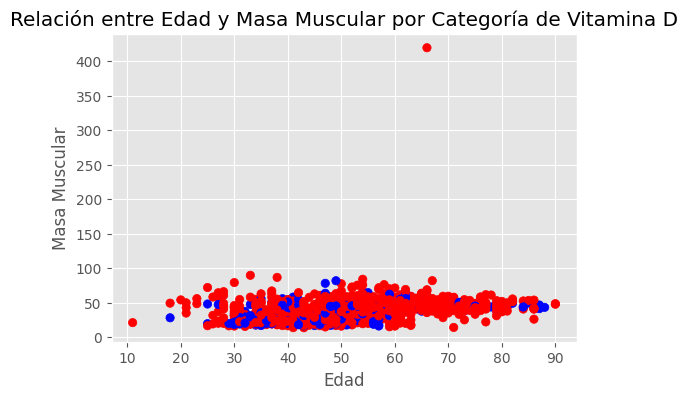

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(dataframe['Edad'], dataframe['MasaMusc'], c=dataframe['CategoriaVitaD'])
ax.set_title("Relación entre Edad y Masa Muscular por Categoría de Vitamina D")
ax.set_xlabel("Edad")
ax.set_ylabel("Masa Muscular")
plt.show()

In [ ]:
X = dataframe.drop(columns=['CategoriaVitaD', 'VitaminaD'])
y = dataframe['CategoriaVitaD']

# Divicion de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

X.shape

(1074, 16)

In [ ]:
# Usando kernel RBF para permitir la no linealidad
svm_model = SVC(kernel='rbf', C=1, gamma='auto')
svm_model.fit(X_train, y_train)

SVC(C=1, gamma='auto')

In [ ]:
# y_pred = svm_model.predict(X_test)


y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

print("Predicciones:", y_pred)


Precisión del modelo: 0.8
Predicciones: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
# Evaluar el modelo
conf_mat = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred) * 100
report = classification_report(y_test, y_pred)

In [ ]:
# Imprimir los resultados
print("Matriz de confusión")
print("-------------------")
print(conf_mat)
print()
print(f"El accuracy de test es: {accuracy} %")
print()
print(report)


Matriz de confusión
-------------------
[[  1  42]
 [  1 171]]

El accuracy de test es: 80.0 %

              precision    recall  f1-score   support

           0       0.50      0.02      0.04        43
           1       0.80      0.99      0.89       172

    accuracy                           0.80       215
   macro avg       0.65      0.51      0.47       215
weighted avg       0.74      0.80      0.72       215



In [ ]:
import joblib
# Guardado del modelo en un archivo

joblib.dump(svm_model, '/content/SVM_model.joblib')

['/content/SVM_model.joblib']